# Week 3 SA

Hey Everyone!!
We hope that you are excited to apply your newly acquired knowledge and test it on this notebook.
In this assignment, we will be walking through creating an email classifier based the content the mail has.

## About the data

The data "email.csv" has a few rows and about 3K columns including <b>Email_no.</b> and <b>spam</b>. <br>
Email_no. is like a unique id for an email and spam denotes whether the given mail is a spam or not (0 = not spam, 1 = spam)<br>
Rest of the columns are words in english with the values being equal to the frequency of that word in the email.
<br>Our goal is to predict whether the given mail is spam or not

## Importing useful libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import accuracy_score

## Loading the data
### If you are using Datalore, you may use the csv file directly. Otherwise you may download it from <a href = "https://drive.google.com/file/d/1OxJ6SSuPypg-AfLbMRl0O9So9aDDNzbC/view?usp=sharing">this link</a>

In [ ]:
df = pd.read_csv('emails.csv')

## Describe the data and generate some basic insights unsing methods like .info

In [ ]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Looking at the data

In [ ]:
# Plot histogram to visualize the top 5 common words in spam mail and non-spam mails seperately.

In [ ]:
df.columns

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)

In [ ]:
df_spam = df.loc[df['Prediction']==1]
df_not_spam = df.loc[df['Prediction']==0]

In [ ]:
spam_word_freqs = df_spam.drop(columns=['Email No.','Prediction'],axis=1).sum()
not_spam_word_freqs = df_not_spam.drop(columns=['Email No.','Prediction'],axis=1).sum()

In [ ]:
sorted_spam_freqs = spam_word_freqs.sort_values(ascending=False).head()
sorted_not_spam_freqs = not_spam_word_freqs.sort_values(ascending=False).head()
type(sorted_spam_freqs)

pandas.core.series.Series

<Axes: title={'center': 'Freq of words in non spam emails'}, xlabel='words', ylabel='Frequency'>

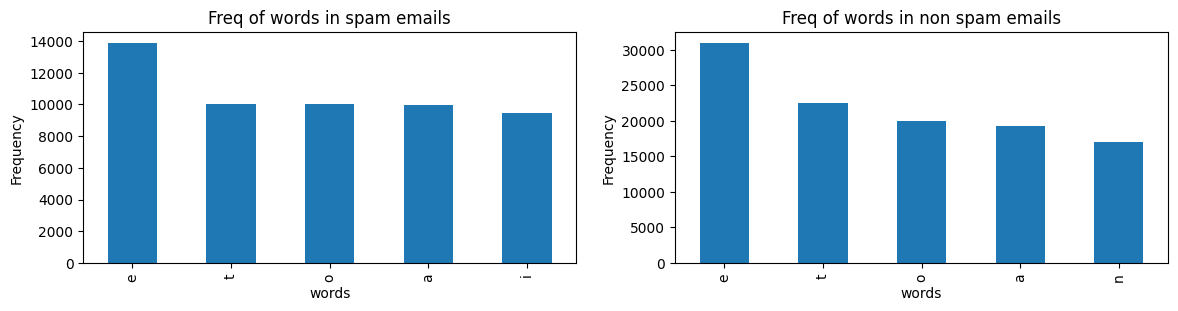

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(14,3))
sorted_spam_freqs.plot(kind='bar',ax=ax[0],xlabel='words',ylabel='Frequency',title='Freq of words in spam emails')
sorted_not_spam_freqs.plot(kind='bar',ax=ax[1],xlabel='words',ylabel='Frequency',title='Freq of words in non spam emails')

## Figuring out some comparatively more important features

In [ ]:
# There are 3K rows given in this dataset, can you think of some method to reduce the number of columns in the dataset?
# Try taking only top 1.5K that will comprise of some of the most "deciding factors"
df_without_null = df.dropna()
X = df_without_null.drop(columns=['Email No.','Prediction'],axis=1)
y = df_without_null['Prediction']

In [ ]:
selector = SelectKBest(chi2, k=1500)
X_selected = selector.fit_transform(X,y)

In [ ]:
len(X_selected), len(X_selected[0])

(517, 1500)

In [ ]:
selected_feature_indices = selector.get_support(indices=True)
X_selected_df = pd.DataFrame(X_selected,columns = X.columns[selected_feature_indices])
X_selected_df.shape

(517, 1500)

## Train - Test Split

In [ ]:
X_selected_df.head()

,the,to,ect,and,for,of,a,you,hou,in,...,hate,debt,reform,australia,prompt,valued,lay,infrastructure,military,ff
0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8.0,13.0,24.0,6.0,6.0,2.0,102.0,1.0,27.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,8.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,5.0,22.0,0.0,5.0,1.0,51.0,2.0,10.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7.0,6.0,17.0,1.0,5.0,2.0,57.0,0.0,9.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Create trianing and testing data
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X_selected_df,y,test_size=0.2,random_state=42)

## Making Predictions using Multinomial NB Classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# Feed the train data into multinomial naive bias classifier
clf = MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
# Check the model's accuracy of test data and plot the ROC-AUC curve

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9711538461538461

[0.         0.02597403 0.02597403 0.03896104 0.03896104 1.        ] [0.         0.92592593 0.96296296 0.96296296 1.         1.        ] [2.         1.         1.         0.03393768 0.02974741 0.        ]
ROC AUC Score: 0.9855699855699855


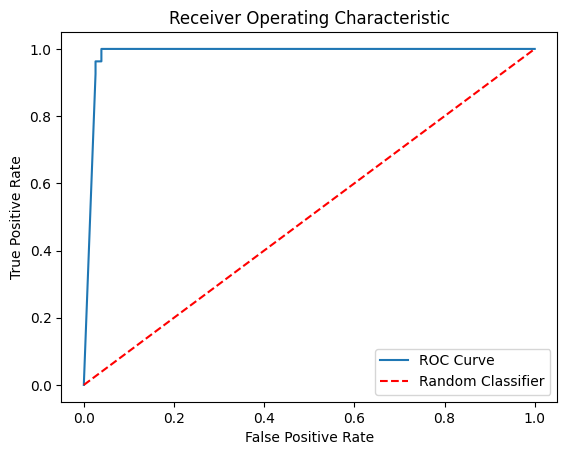

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute the predicted probabilities for positive class
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Compute the FPR, TPR, and threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
print(fpr,tpr,thresholds)
# Compute the ROC AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", auc_score)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'r--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()


## Plot the confusion Matrix

Text(50.722222222222214, 0.5, 'Actual')

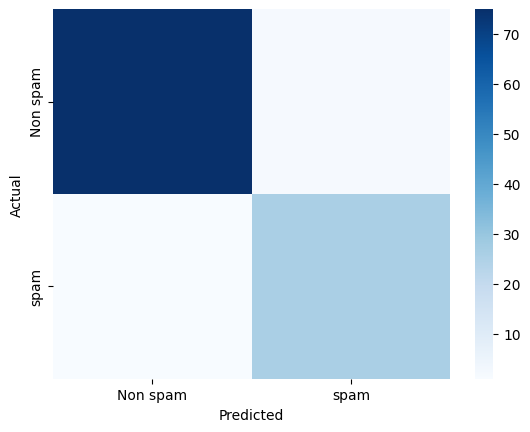

In [ ]:
# Print Confusion Matrix using any 5 words of your choice with the column 'spam'
from sklearn.metrics import confusion_matrix
import seaborn as sns
confusion_mat = confusion_matrix(y_test,y_pred)

sns.heatmap(confusion_mat,cmap='Blues',fmt="d",xticklabels=['Non spam', 'spam'], yticklabels=['Non spam', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')

## Trying out with SVMs

In [ ]:
# Try using Support Vector Classifier (SVC) from scikit-learn
# Apply similar processes as above through SVC i.e., Make prediction, check accuacy and plot confusion matrix
from sklearn.svm import SVC

In [ ]:
clf_svc = SVC()
clf_svc.fit(X_train,y_train)

SVC()

In [ ]:
y_pred_svc = clf_svc.predict(X_test)

In [ ]:
accuracy_svc = accuracy_score(y_test,y_pred_svc)
accuracy_svc

0.7596153846153846

Text(50.722222222222214, 0.5, 'Actual')

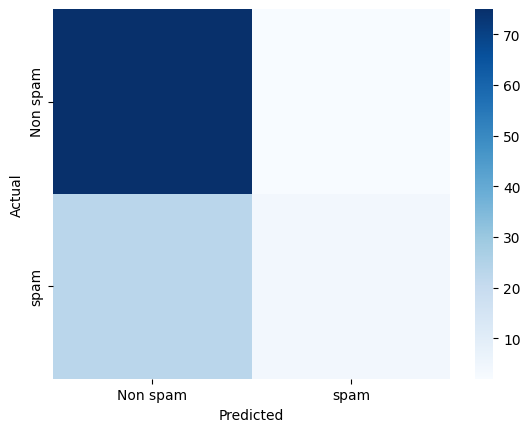

In [ ]:
confusion_mat_svc = confusion_matrix(y_test,y_pred_svc)

sns.heatmap(confusion_mat_svc,cmap='Blues',fmt="d",xticklabels=['Non spam', 'spam'], yticklabels=['Non spam', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')

## Comparing the models

<BarContainer object of 2 artists>

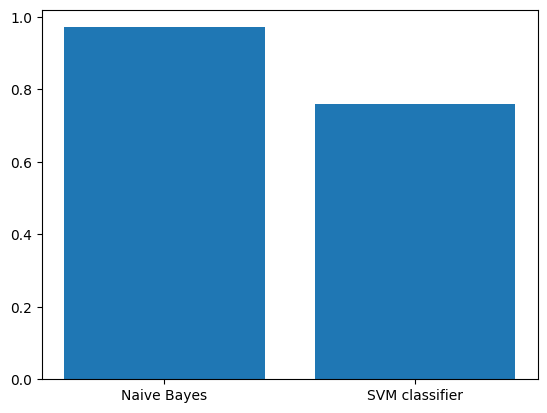

In [ ]:
# Which model performed better?
# Can you suggest some reason for better performance of one model over the other?
acc = [accuracy,accuracy_svc]
clfrs = ['Naive Bayes','SVM classifier']
plt.bar(clfrs,acc)

**By observing the characteristics, we can say Naive Bayes classifier giving good results and the reason for the same is NB model considers each feature as an independent one and also due presence of high dimensional data, we can say Naive Bayes classifier is better than SVM in this context**

## Bonus Question

In [ ]:
# Given a string. Try to create the dataset having each word of dataset as column and row values as the frequency of that word.
# For example
# s = "I am a Python developer and currently working on a project to classify mails"
# dataframe = {"I" : 1,
#              "am" :1,
#              "a" : 2,
#               ...}

In [ ]:
s = "I am a Python developer and currently working on a project to classify mails"

In [ ]:
words = s.split()
dict = {}
for word in words:
  if word in dict:
    dict[word] += 1
  else:
    dict[word] = 1
print(dict)

{'I': 1, 'am': 1, 'a': 2, 'Python': 1, 'developer': 1, 'and': 1, 'currently': 1, 'working': 1, 'on': 1, 'project': 1, 'to': 1, 'classify': 1, 'mails': 1}
